## Effects of Rocks on Regolith Temperatures

Regolith temperatures at night on the Moon may be influenced by rocks through both conduction and radiation. Heat conduction from the rock to the regolith is represented by

$$Q_\textrm{cond} = k \frac{T_\textrm{rock}-T_\textrm{reg}}{x}$$

where $k$ is the conductivity of the regolith, and $x$ is the distance from the rock. This conducted heat flux can be compared to the radiant heat flux of the regolith

$$Q_\textrm{rad} = \epsilon\sigma T_\textrm{reg}^4$$

To a first approximation, we model rock and regolith temperatures separately, as in *Bandfield et al.* (2011) and *Vasavada et al.* (2012). For example, at midnight, $T_\textrm{reg} \approx$ 100 K, and $T_\textrm{rock} \approx$ 215 K.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import planetRad as pr
%matplotlib inline

In [12]:
k = 1.0e-3
emissivity = 0.95
T_reg = 100.0
T_rock = 215.0
x = np.logspace(-4,0,100)

In [13]:
Q_cond = k*(T_rock-T_reg)/x
Q_rad = pr.sigma*T_reg**4

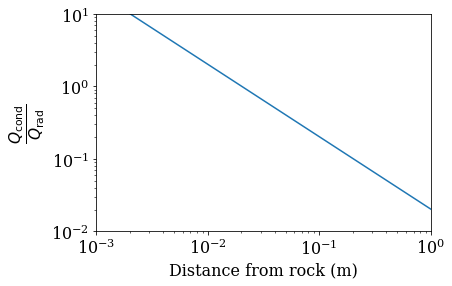

In [14]:
plt.loglog(x,Q_cond/Q_rad)
font = {'family' : 'serif',
        'size'   : 16}
plt.xlabel('Distance from rock (m)',fontsize=16)
plt.ylabel(r'$\frac{Q_\mathrm{cond}}{Q_\mathrm{rad}}$',fontsize=22)
plt.axis([1e-3,1,1e-2,10])
matplotlib.rc('font', **font)
plt.show()

This shows that the conducted flux from the rock is important in the surface energy budget at distances $x \lesssim 2$ cm, where it is comparable to the radiant flux, i.e., $Q_\textrm{cond} = Q_\textrm{rad}$. At smaller distances, the temperature is increased by an amount $\delta T$ given by

$$k\frac{T_\textrm{rock}-(T_\textrm{reg}+\delta T)}{x} \approx \epsilon \sigma (T_\textrm{reg}+\delta T)^4$$

Since $\delta T \ll T_\textrm{reg}$, we can neglect terms in $\delta T^2$ and higher order, and approximate by Taylor expansion

$$(T_\textrm{reg}+\delta T)^4 \approx T_\textrm{reg}^4 + 4T_\textrm{reg}^3\delta T + \ldots $$

Then solve

$$ (k/x)T_\textrm{rock} - (k/x)T_\textrm{reg} - \epsilon \sigma T_\textrm{reg}^4 = (4\epsilon \sigma T_\textrm{reg}^3 + k/x)\delta T $$

$$ Q_\textrm{cond} - Q_\textrm{rad} \approx (4\epsilon \sigma T_\textrm{reg}^3 + k/x)\delta T $$

such that

$$ \delta T \approx \frac{Q_\textrm{cond}-Q_\textrm{rad}}{4\epsilon \sigma T_\textrm{reg}^3 + k/x} $$

In [15]:
deltaT = (Q_cond - Q_rad)/(4*emissivity*pr.sigma*T_reg**3 + k/x)
#k = 1e-2
#Q_cond = k*(T_rock-T_reg)/x
#Q_rad = pr.sigma*T_reg**4
#deltaT_high = (Q_cond - Q_rad)/(4*emissivity*pr.sigma*T_reg**3 + k/x)
#k = 1e-4
#Q_cond = k*(T_rock-T_reg)/x
#Q_rad = pr.sigma*T_reg**4
#deltaT_low = (Q_cond - Q_rad)/(4*emissivity*pr.sigma*T_reg**3 + k/x)

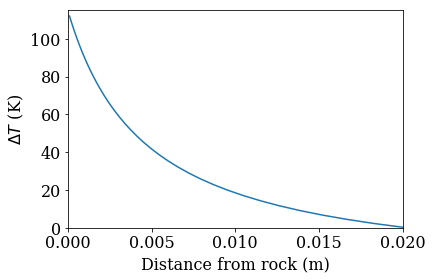

In [17]:
plt.figure
matplotlib.rc('font', **font)
plt.plot(x, deltaT) #,x,deltaT_high,x,deltaT_low)
#plt.xticks(np.arange(0,10,0.25),np.arange(0,10,0.25))
#plt.axis([0,10,0,120])
plt.ylim([0,T_rock-T_reg])
plt.xlim([0,0.02])
plt.xlabel('Distance from rock (m)')
plt.ylabel('$\Delta T$ (K)')
plt.show()

Conduction increases the area of enhanced emission by a factor $\sim 2x/R$, where $R$ is the rock radius. For example, a 1-m rock affecting a region extending $\sim 2$ cm, has an emitting area $\sim 4\%$ larger than the rock itself. However, this conducted heat is taken away from the rock, so that its temperature must also decrease more rapidly during the night. Therefore, conduction by regolith is not expected to lead to significant errors in rock abundance estimates, for rocks $>$1 m.

### Effects of Rocks on Regolith Temperatures, for Typical Rock Abundances

Given a rock abundance (i.e., area fraction) $C$ and rock radius $R$, the mean distance between rocks is

$$ d \sim \left(\frac{A_\mathrm{rock}}{C}\right)^\frac{1}{2} - R = \left(\frac{2}{\sqrt{C}} - 1\right)R $$

Typical rock concentrations on the Moon are $C \approx 1\%$ (*Bandfield et al.*, 2011), such that meter-sized rocks are typically spaced by $d \approx 20$ m. This means that the average distance to a rock on the lunar surface is $\sim 10$ m, and the fractional area of regolith affected by heat conducted from rocks is $\sim (2x/R)/d^2 \approx 1\times 10^{-4}$.

In [20]:
R = 1.0
C = 1.0e-2
d = 2*R/np.sqrt(C) - R

In [21]:
d

19.0

In [23]:
2*0.02/R/d**2

0.000110803324099723